# Stock Market Analysis

1) What was the change in price of stock over time?

2) What was the moving average(MA) of stock in long term and short term?

3) What was the daily return of the stock on average?


4) What was the correlation between daily returns of different stocks?

5) What is the cumulative return over time?

6) How much value do we put at risk by investing in a stock?

In [57]:
#Install the dependencies

import pandas as pd 
import numpy as np
import datetime as dt
import pandas_datareader as pdr

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")

%matplotlib inline

In [58]:
#Enter the start date of stock analysis 
date_entry= input('Enter a start date in YYYY-MM-DD format:  ')
year, month, day = map(int, date_entry.split('-'))
start= dt.date(year, month, day)

#Enter the end date of stock analysis 
date_entry1= input('Enter an end date in YYYY-MM-DD format:  ')
year, month, day = map(int, date_entry1.split('-'))
end= dt.date(year, month, day)

Enter a start date in YYYY-MM-DD format:  2020-03-01
Enter an end date in YYYY-MM-DD format:  2021-09-01


In [59]:
GOOG=pdr.DataReader('GOOG', 'yahoo', start, end)
GOOG.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-03-02,1390.869995,1326.814941,1351.609985,1389.109985,2431500,1389.109985
2020-03-03,1410.150024,1332.000000,1399.420044,1341.390015,2402300,1341.390015
2020-03-04,1388.089966,1343.109985,1359.229980,1386.520020,1913300,1386.520020
2020-03-05,1358.910034,1305.099976,1350.199951,1319.040039,2561300,1319.040039
2020-03-06,1306.219971,1261.050049,1277.060059,1298.410034,2660600,1298.410034


In [60]:
# summary of data
GOOG.describe()

,High,Low,Open,Close,Volume,Adj Close
count,381.000000,381.000000,381.000000,381.000000,3.810000e+02,381.000000
mean,1876.257822,1836.742042,1854.779026,1857.772688,1.656131e+06,1857.772688
std,485.781239,487.923356,486.321753,487.494398,7.331718e+05,487.494398
min,1071.319946,1013.536011,1056.510010,1056.619995,3.468000e+05,1056.619995
25%,1482.949951,1450.920044,1466.209961,1464.969971,1.200300e+06,1464.969971
50%,1771.364990,1737.005005,1751.635010,1749.130005,1.484200e+06,1749.130005
75%,2295.320068,2257.679932,2276.979980,2285.879883,1.901900e+06,2285.879883
max,2936.409912,2912.290039,2917.689941,2916.840088,4.329100e+06,2916.840088


In [61]:
GOOG.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 381 entries, 2020-03-02 to 2021-09-01
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       381 non-null    float64
 1   Low        381 non-null    float64
 2   Open       381 non-null    float64
 3   Close      381 non-null    float64
 4   Volume     381 non-null    int64  
 5   Adj Close  381 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 20.8 KB


In [62]:
AAPL=pdr.DataReader('AAPL', 'yahoo', start, end)
AAPL.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-03-02,75.360001,69.430000,70.570000,74.702499,341397200.0,73.891487
2020-03-03,76.000000,71.449997,75.917503,72.330002,319475600.0,71.544739
2020-03-04,75.849998,73.282501,74.110001,75.684998,219178400.0,74.863312
2020-03-05,74.887497,72.852501,73.879997,73.230003,187572800.0,72.434975
2020-03-06,72.705002,70.307503,70.500000,72.257500,226176800.0,71.473038


In [63]:
NFLX=pdr.DataReader('NFLX', 'yahoo', start, end)
NFLX.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-03-02,381.359985,364.500000,373.109985,381.049988,6997900,381.049988
2020-03-03,393.519989,367.399994,381.029999,368.769989,8364600,368.769989
2020-03-04,384.010010,370.510010,377.769989,383.790009,5487300,383.790009
2020-03-05,391.399994,368.640015,381.000000,372.779999,8747000,372.779999
2020-03-06,371.309998,356.850006,367.700012,368.970001,8147200,368.970001


In [64]:
FB=pdr.DataReader('FB', 'yahoo', start, end)
FB.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-03-02,196.570007,188.850006,194.029999,196.440002,24949000,196.440002
2020-03-03,197.240005,183.970001,196.220001,185.889999,27984100,185.889999
2020-03-04,191.830002,186.389999,189.169998,191.759995,23062500,191.759995
2020-03-05,188.990005,183.889999,186.779999,185.169998,19333400,185.169998
2020-03-06,183.779999,176.259995,178.330002,181.089996,24559600,181.089996


# Opening & Closing Price of Companies

In [65]:
company_name=[GOOG, AAPL, NFLX, FB]
stock_list=['GOOG','AAPL', 'NFLX', 'FB']

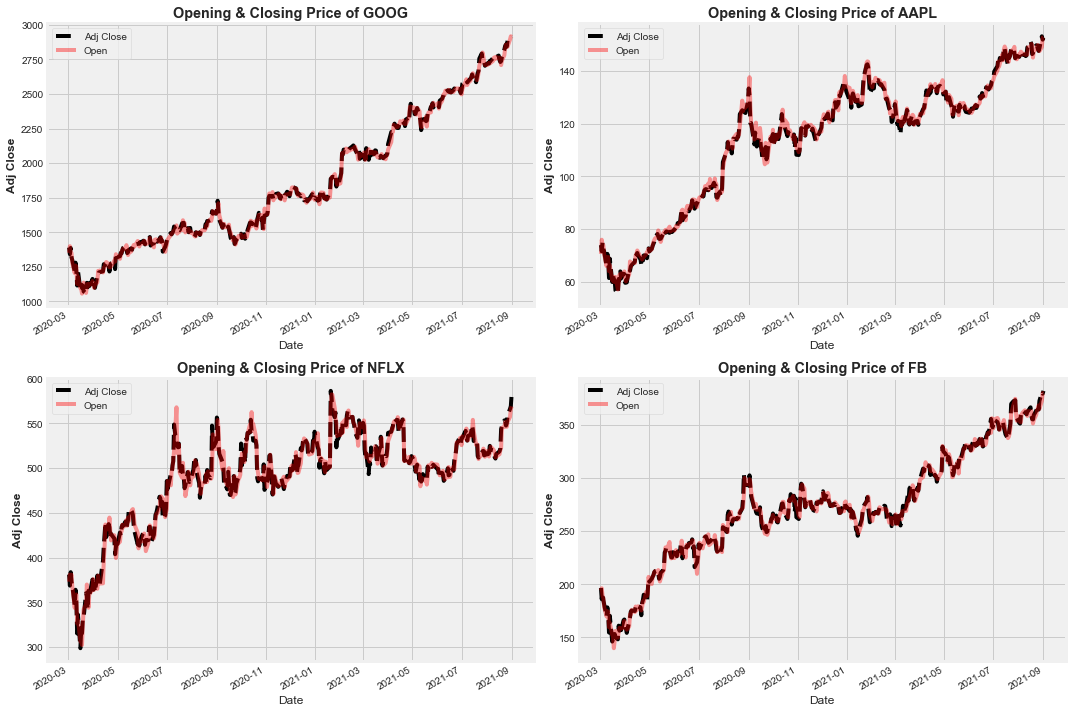

In [66]:
# Opening and closing price of companies in the timeframe
plt.figure(figsize=(15, 10))
plt.subplots_adjust()

for i, company in enumerate(company_name, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot(color='k',linestyle='--')
    company['Open'].plot(color='r', alpha=.4)
    plt.ylabel('Adj Close', weight= 'bold')
    plt.title(f"Opening & Closing Price of {stock_list[i - 1]}", weight= 'bold')
    plt.legend()
    
plt.tight_layout()

# Moving Average(MA) in Short Term and Long Term

In [67]:
# calculating moving average of stocks
def moving_average(df):
    time_period=[30,100]
    
    for ma in time_period:
        column=("MA for %s days" %(str(ma)))
        df[column] = df["Adj Close"].rolling(window=ma, center=False).mean()
        
    return df

In [68]:
print(moving_average(GOOG))
print(moving_average(AAPL))
print(moving_average(NFLX))
print(moving_average(FB))

                   High          Low         Open        Close   Volume  \
Date                                                                      
2020-03-02  1390.869995  1326.814941  1351.609985  1389.109985  2431500   
2020-03-03  1410.150024  1332.000000  1399.420044  1341.390015  2402300   
2020-03-04  1388.089966  1343.109985  1359.229980  1386.520020  1913300   
2020-03-05  1358.910034  1305.099976  1350.199951  1319.040039  2561300   
2020-03-06  1306.219971  1261.050049  1277.060059  1298.410034  2660600   
...                 ...          ...          ...          ...      ...   
2021-08-26  2862.696045  2841.830078  2852.370117  2842.459961   746100   
2021-08-27  2900.219971  2840.399902  2842.250000  2891.010010  1228100   
2021-08-30  2929.790039  2892.000000  2894.090088  2909.389893   845800   
2021-08-31  2922.239990  2900.000000  2917.689941  2909.239990  1337800   
2021-09-01  2936.409912  2912.290039  2913.000000  2916.840088   791200   

              Adj Close 

In [69]:
# Calculatign weighted moving average of stocks
def weighted_moving_average(df):
    df['Weighted MA'] = df['Adj Close'].ewm(span=50, adjust=False).mean() 
   
    return df

In [70]:
print(weighted_moving_average(GOOG))
print(weighted_moving_average(AAPL))
print(weighted_moving_average(NFLX))
print(weighted_moving_average(FB))

                   High          Low         Open        Close   Volume  \
Date                                                                      
2020-03-02  1390.869995  1326.814941  1351.609985  1389.109985  2431500   
2020-03-03  1410.150024  1332.000000  1399.420044  1341.390015  2402300   
2020-03-04  1388.089966  1343.109985  1359.229980  1386.520020  1913300   
2020-03-05  1358.910034  1305.099976  1350.199951  1319.040039  2561300   
2020-03-06  1306.219971  1261.050049  1277.060059  1298.410034  2660600   
...                 ...          ...          ...          ...      ...   
2021-08-26  2862.696045  2841.830078  2852.370117  2842.459961   746100   
2021-08-27  2900.219971  2840.399902  2842.250000  2891.010010  1228100   
2021-08-30  2929.790039  2892.000000  2894.090088  2909.389893   845800   
2021-08-31  2922.239990  2900.000000  2917.689941  2909.239990  1337800   
2021-09-01  2936.409912  2912.290039  2913.000000  2916.840088   791200   

              Adj Close 

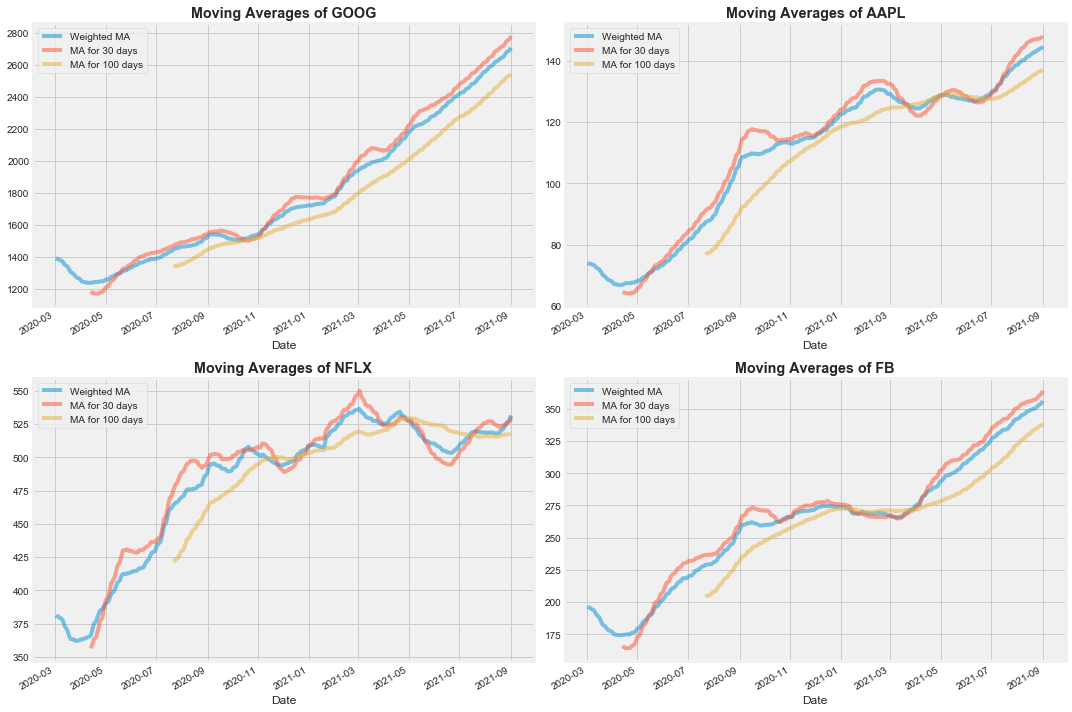

In [71]:
plt.figure(figsize=(15, 10))
plt.subplots_adjust()

for i, company in enumerate(company_name, 1):
    plt.subplot(2, 2, i)
    company['Weighted MA'].plot(alpha=.5)
    company['MA for 30 days'].plot(alpha=.5)
    company['MA for 100 days'].plot(alpha=.5)
    plt.title(f"Moving Averages of {stock_list[i - 1]}", weight= 'bold')
    plt.legend()
    
plt.tight_layout()

# Daily Return

In [72]:
def daily_return_analysis(df):
    df["Daily_Return"]= df['Adj Close'].pct_change()
    
    return df

In [73]:
print(daily_return_analysis(GOOG))
print(daily_return_analysis(AAPL))
print(daily_return_analysis(NFLX))
print(daily_return_analysis(FB))

                   High          Low         Open        Close   Volume  \
Date                                                                      
2020-03-02  1390.869995  1326.814941  1351.609985  1389.109985  2431500   
2020-03-03  1410.150024  1332.000000  1399.420044  1341.390015  2402300   
2020-03-04  1388.089966  1343.109985  1359.229980  1386.520020  1913300   
2020-03-05  1358.910034  1305.099976  1350.199951  1319.040039  2561300   
2020-03-06  1306.219971  1261.050049  1277.060059  1298.410034  2660600   
...                 ...          ...          ...          ...      ...   
2021-08-26  2862.696045  2841.830078  2852.370117  2842.459961   746100   
2021-08-27  2900.219971  2840.399902  2842.250000  2891.010010  1228100   
2021-08-30  2929.790039  2892.000000  2894.090088  2909.389893   845800   
2021-08-31  2922.239990  2900.000000  2917.689941  2909.239990  1337800   
2021-09-01  2936.409912  2912.290039  2913.000000  2916.840088   791200   

              Adj Close 

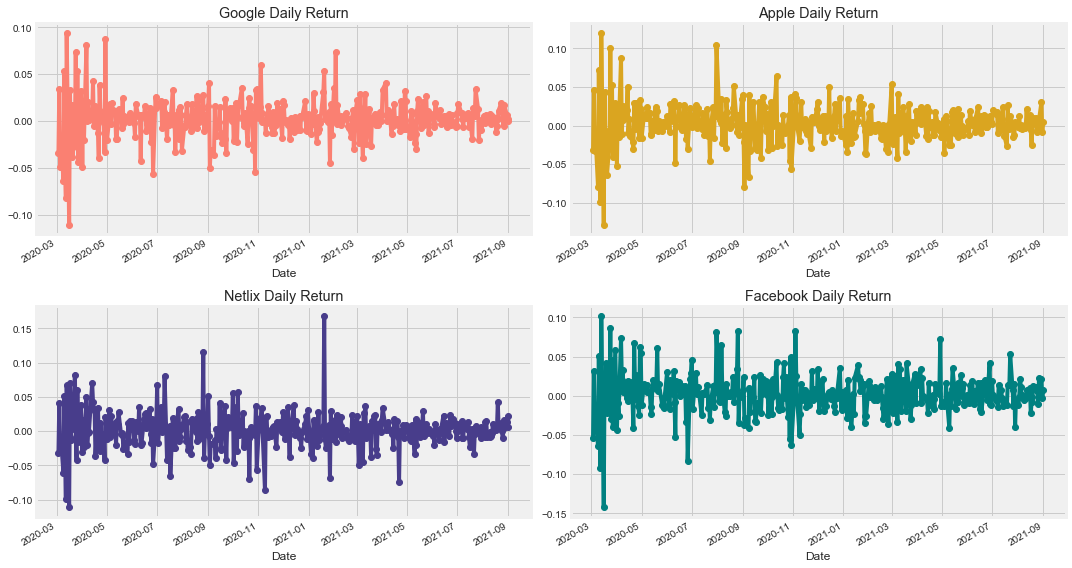

In [74]:
#representing daily returns in form of a plot
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

GOOG['Daily_Return'].plot(ax=axes[0,0], color='salmon', title='Google Daily Return' , marker='o' )
AAPL['Daily_Return'].plot(ax=axes[0,1], color='goldenrod', title='Apple Daily Return', marker='o' )
NFLX['Daily_Return'].plot(ax=axes[1,0], color='darkslateblue', title='Netlix Daily Return', marker='o' )
FB['Daily_Return'].plot(ax=axes[1,1], color='teal', title='Facebook Daily Return', marker='o' )


fig.tight_layout()

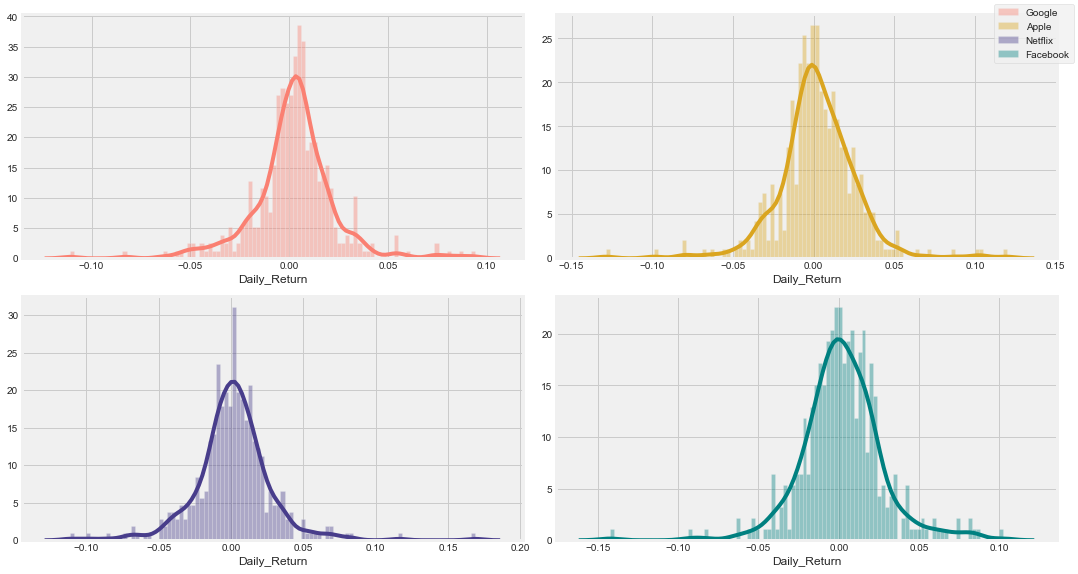

In [75]:
# plotting daily return distribution 
fig, axes = plt.subplots(2,2)
fig.set_figheight(8)
fig.set_figwidth(15)

sns.distplot(GOOG['Daily_Return'].dropna(),bins=100,color='salmon', label='Google', ax=axes[0,0])
sns.distplot(AAPL['Daily_Return'].dropna(),bins=100,color='goldenrod', label='Apple', ax=axes[0,1])
sns.distplot(NFLX['Daily_Return'].dropna(),bins=100,color='darkslateblue', label='Netflix', ax=axes[1,0])
sns.distplot(FB['Daily_Return'].dropna(),bins=100,color='teal', label='Facebook', ax=axes[1,1])

fig.legend()
plt.tight_layout()

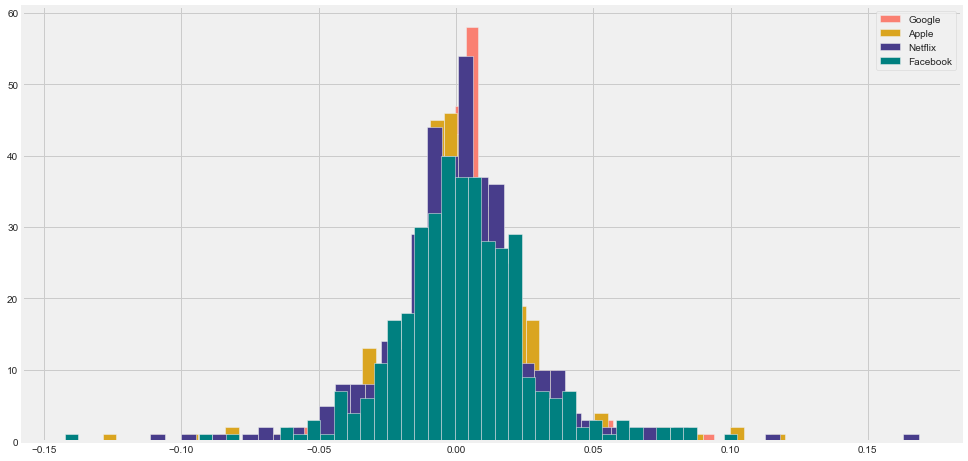

In [101]:
# comparing volatilities of stocks
GOOG['Daily_Return'].hist(bins=50, label='Google', figsize=(15,8), color='salmon')
AAPL['Daily_Return'].hist(bins=50, label='Apple',color='goldenrod')
NFLX['Daily_Return'].hist(bins=50, label='Netflix',color='darkslateblue')
FB['Daily_Return'].hist(bins=50, label='Facebook',color='teal') 
plt.legend()

# Daily Return Correlation Between Companies

In [77]:
list_daily_return=pdr.DataReader(stock_list, 'yahoo', start, end)['Adj Close'].pct_change().dropna()
list_daily_return

Symbols,GOOG,AAPL,NFLX,FB
Date,,,,
2020-03-03,-0.034353,-0.031759,-0.032227,-0.053706
2020-03-04,0.033644,0.046385,0.040730,0.031578
2020-03-05,-0.048669,-0.032437,-0.028688,-0.034366
2020-03-06,-0.015640,-0.013280,-0.010220,-0.022034
2020-03-09,-0.063809,-0.079092,-0.060926,-0.064001
...,...,...,...,...
2021-08-26,-0.005785,-0.005527,0.004639,-0.010885
2021-08-27,0.017080,0.007185,0.015996,0.022641
2021-08-30,0.006358,0.030417,0.012989,0.021550


In [78]:
daily_return_mean=list_daily_return.mean()
print(daily_return_mean)

Symbols
GOOG    0.002181
AAPL    0.002219
NFLX    0.001469
FB      0.002082
dtype: float64


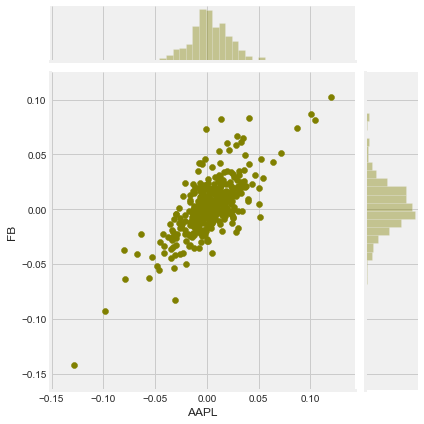

In [79]:
# Correlation between 2 different stocks
sns.jointplot('AAPL', 'FB', list_daily_return, kind='scatter', color='olive')

plt.tight_layout()

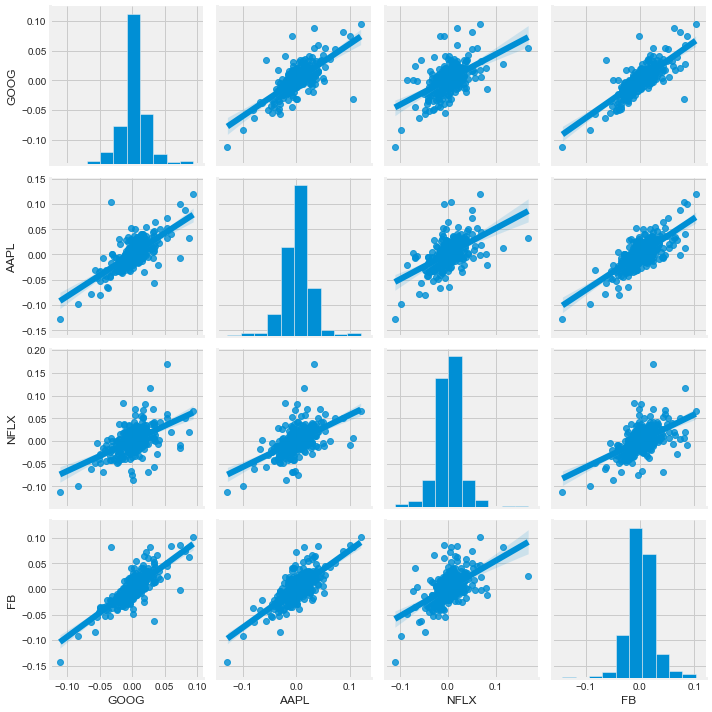

In [80]:
# Correlation between all stocks
sns.pairplot(list_daily_return, kind='reg')

plt.tight_layout()

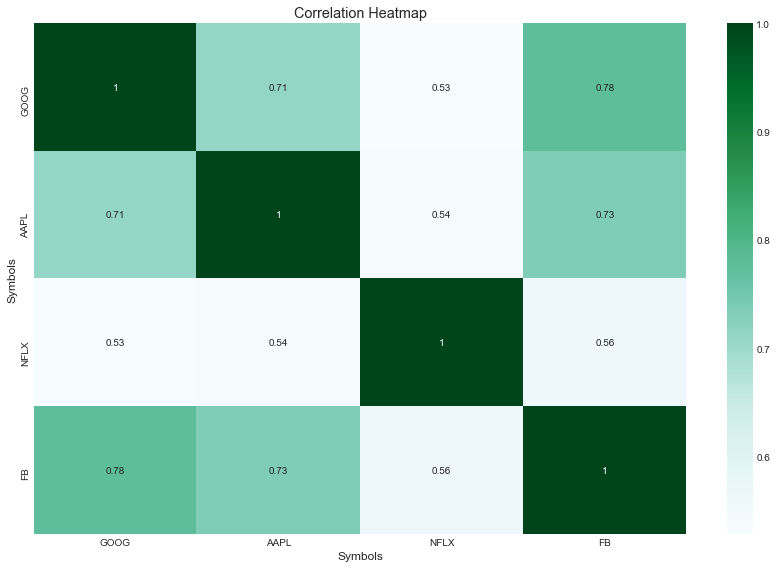

In [81]:
# Correlation between all stocks with heatmap

plt.figure(figsize=(12,8))
heatmap=sns.heatmap(list_daily_return.corr(), annot=True, cmap='BuGn')
heatmap.set_title("Correlation Heatmap")

plt.tight_layout()

# Cumulative Return

In [82]:
# Calculating return of $1 by time
GOOG['cum_return']= (1+ GOOG['Daily_Return']).cumprod()
AAPL['cum_return']= (1+ AAPL['Daily_Return']).cumprod()
NFLX['cum_return']= (1+ NFLX['Daily_Return']).cumprod()
FB['cum_return']= (1+ FB['Daily_Return']).cumprod()

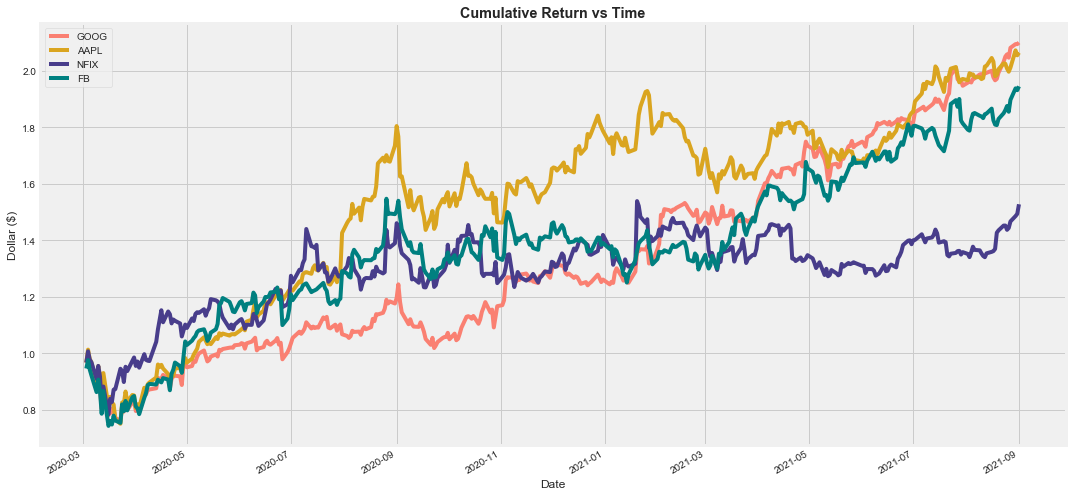

In [83]:
GOOG['cum_return'].plot(label='GOOG', figsize=(15,7), ylabel=('Dollar ($)'), color='salmon')
AAPL['cum_return'].plot(label='AAPL', color='goldenrod')
NFLX['cum_return'].plot(label='NFlX', color='darkslateblue')
FB['cum_return'].plot(label='FB', color='teal')

plt.title('Cumulative Return vs Time', weight= 'bold')
plt.legend()

plt.tight_layout()

# Risk by Investing

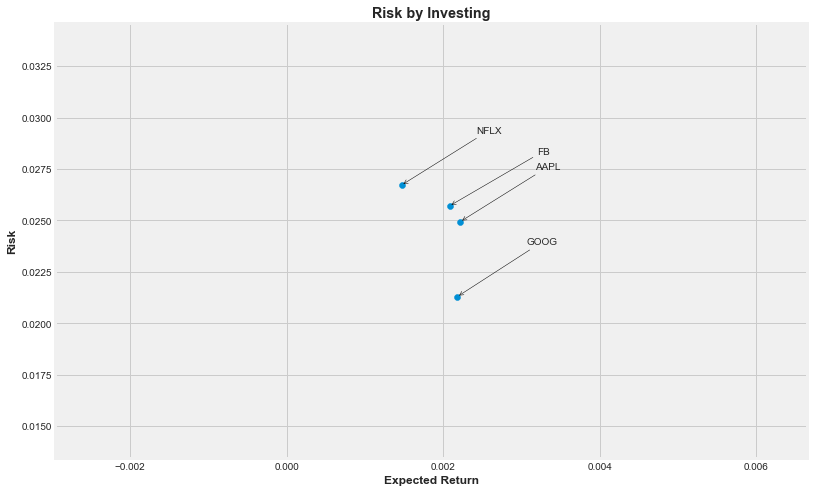

In [84]:
plt.figure(figsize=(12,8))

plt.scatter(list_daily_return.mean(),list_daily_return.std())

plt.title('Risk by Investing', weight= 'bold')
plt.xlabel('Expected Return', weight= 'bold')
plt.ylabel('Risk', weight= 'bold')


#For adding annotatios in the scatterplot
for label,x,y in zip(list_daily_return.columns,list_daily_return.mean(),list_daily_return.std()):
    plt.annotate(
    label,
    xy=(x,y),xytext=(100,50),
    textcoords = 'offset points', ha = 'right', va = 'bottom',
    arrowprops=dict(arrowstyle='->', color='k', connectionstyle='arc3,rad=0'))